In [15]:
# Importing important libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
df = pd.read_csv('Breast_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Getting an idea about the duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Now, there are no duplicates in the data

In [4]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# If you get True in the above block of code ->
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
# List of numeric columns (use 'number' to select numeric data)
num_columns = df.select_dtypes(include=['number']).columns

# Loop through each numeric column and fill NaN with the mean
for col in num_columns:
    df.loc[:, col] = df[col].fillna(df[col].mean())

In [7]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
df=df.drop(['Unnamed: 32'],axis=1)

In [9]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df=df.drop(['id'],axis=1)

In [11]:
data_cleaned=df.drop_duplicates()

In [12]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].astype('category').cat.codes  # Encode region

In [14]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int8   
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

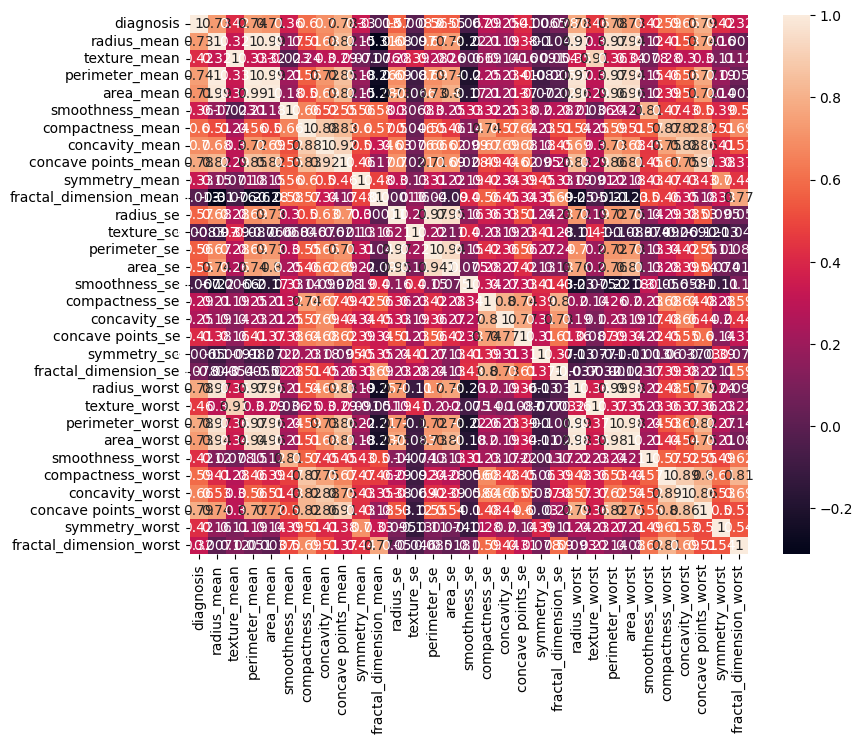

In [16]:
# Correlation Analysis (Pearson's Correlation Coefficient)
plt.figure(figsize = (9, 7))
sns.heatmap(data_cleaned.corr(), annot = True)
plt.show()

In [17]:
# Seperating the input and output data
X = data_cleaned.drop('diagnosis', axis = 1)
y = data_cleaned['diagnosis']

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 5)

In [20]:
# Build the Deep Learning Model
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [ ]:
'''
Compiling the model -> setting the strategy for learning
(1) loss function -> This given an idea about the error in the model
(2) optimizer -> controls how the model learns by
adjusting the weights during backward propogation
(3) metrics -> what should be reported diuring the training phase
'''

In [22]:
# Training the model
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2933 - loss: 0.8713 - val_accuracy: 0.4783 - val_loss: 0.7426
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5511 - loss: 0.6984 - val_accuracy: 0.5870 - val_loss: 0.6676
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7691 - loss: 0.6084 - val_accuracy: 0.7174 - val_loss: 0.6167
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8914 - loss: 0.5438 - val_accuracy: 0.7609 - val_loss: 0.5785
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8909 - loss: 0.4939 - val_accuracy: 0.7826 - val_loss: 0.5490
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8891 - loss: 0.4615 - val_accuracy: 0.8261 - val_loss: 0.5239
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9140 - loss: 0.4150 - val_accuracy: 0.8261 - val_loss: 0.5017
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9225 - loss: 0.3871 - val_accuracy: 0.8261 - val_los

In [ ]:
'''
Training Accuracy -> 98.88%
Validation Accuracy -> 89.13%

Training and Validation performance are overfitting.
Also, both the performance values are above 98%
'''

In [23]:
# Evaluate the model on testing dataset
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9759 - loss: 0.1161 
Test Loss: 0.1211
Test Accuracy: 0.9737


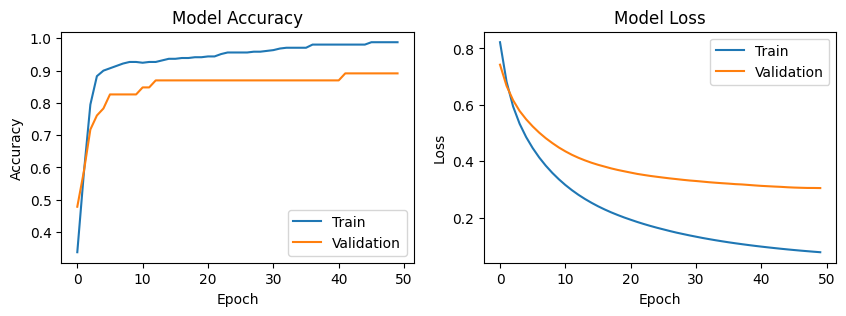

In [24]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy Plot
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

In [25]:
# Importing the data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128821 entries, 0 to 128820
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    128821 non-null  int64  
 1   V1      128821 non-null  float64
 2   V2      128821 non-null  float64
 3   V3      128821 non-null  float64
 4   V4      128821 non-null  float64
 5   V5      128821 non-null  float64
 6   V6      128821 non-null  float64
 7   V7      128821 non-null  float64
 8   V8      128821 non-null  float64
 9   V9      128821 non-null  float64
 10  V10     128821 non-null  float64
 11  V11     128821 non-null  float64
 12  V12     128821 non-null  float64
 13  V13     128821 non-null  float64
 14  V14     128821 non-null  float64
 15  V15     128821 non-null  float64
 16  V16     128820 non-null  float64
 17  V17     128820 non-null  float64
 18  V18     128820 non-null  float64
 19  V19     128820 non-null  float64
 20  V20     128820 non-null  float64
 21  V21     12

In [27]:
#Count of duplicated rows
df[df.duplicated()].shape

(489, 31)

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128820 entries, 0 to 128819
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    128820 non-null  int64  
 1   V1      128820 non-null  float64
 2   V2      128820 non-null  float64
 3   V3      128820 non-null  float64
 4   V4      128820 non-null  float64
 5   V5      128820 non-null  float64
 6   V6      128820 non-null  float64
 7   V7      128820 non-null  float64
 8   V8      128820 non-null  float64
 9   V9      128820 non-null  float64
 10  V10     128820 non-null  float64
 11  V11     128820 non-null  float64
 12  V12     128820 non-null  float64
 13  V13     128820 non-null  float64
 14  V14     128820 non-null  float64
 15  V15     128820 non-null  float64
 16  V16     128820 non-null  float64
 17  V17     128820 non-null  float64
 18  V18     128820 non-null  float64
 19  V19     128820 non-null  float64
 20  V20     128820 non-null  float64
 21  V21     128820 

In [33]:
# Seperating the input and output data
X = df.drop('Class', axis = 1)
y = df['Class']

In [34]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 5)

In [36]:
# Build the Deep Learning Model
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [37]:
# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [ ]:
'''
Compiling the model -> setting the strategy for learning
(1) loss function -> This given an idea about the error in the model
(2) optimizer -> controls how the model learns by
adjusting the weights during backward propogation
(3) metrics -> what should be reported diuring the training phase
'''

In [39]:
# Training the model
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 32, verbose = 1)

Epoch 1/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9991 - val_loss: 0.0048
Epoch 2/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9990 - loss: 0.0043 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 3/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9991 - val_loss: 0.0048
Epoch 4/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9991 - val_loss: 0.0048
Epoch 5/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9991 - loss: 0.0043 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 6/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9991 - loss: 0.0032 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 7/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 8/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9992 - loss: 0.0030 -

In [ ]:
'''
Training Accuracy -> 99.92
Validation Accuracy -> 99.91%

Training and Validation performance are morethan 99.92
Also, both the performance values are above 98%
'''

In [40]:
# Evaluate the model on testing dataset
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

806/806 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9987 - loss: 0.0036
Test Loss: 0.0036
Test Accuracy: 0.9989


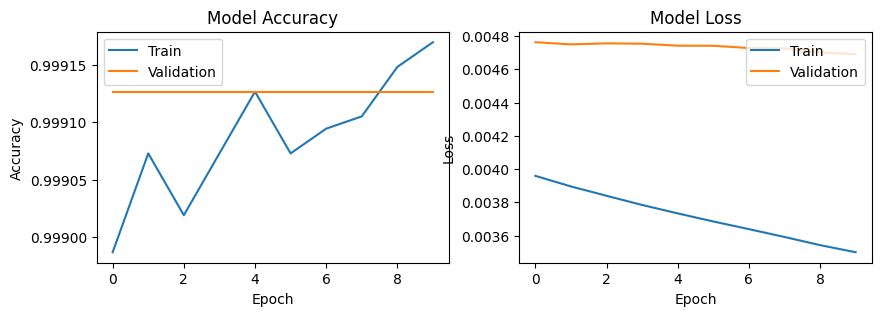

In [41]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy Plot
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

In [42]:
# Importing the data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
# Seperating the input and output data
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [47]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 5)

In [49]:
# Build the Deep Learning Model
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [50]:
# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [ ]:
'''
Compiling the model -> setting the strategy for learning
(1) loss function -> This given an idea about the error in the model
(2) optimizer -> controls how the model learns by
adjusting the weights during backward propogation
(3) metrics -> what should be reported diuring the training phase
'''

In [52]:
# Training the model
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7218 - loss: 0.5797 - val_accuracy: 0.7097 - val_loss: 0.5799
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7506 - loss: 0.5745 - val_accuracy: 0.7097 - val_loss: 0.5729
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7080 - loss: 0.5899 - val_accuracy: 0.7097 - val_loss: 0.5675
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7467 - loss: 0.5648 - val_accuracy: 0.7097 - val_loss: 0.5621
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7314 - loss: 0.5730 - val_accuracy: 0.7419 - val_loss: 0.5567
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7302 - loss: 0.5669 - val_accuracy: 0.7419 - val_loss: 0.5524
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7177 - loss: 0.5672 - val_accuracy: 0.7419 - val_loss: 0.5466
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7179 - loss: 0.5682 - val_accuracy: 0.7258 - 

In [ ]:
'''
Training Accuracy -> 75.84%
Validation Accuracy -> 79%

Training and Validation performance are withon 5%
Also, both the performance values are above 75%
'''

In [53]:
# Evaluate the model on testing dataset
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8083 - loss: 0.4372 
Test Loss: 0.4309
Test Accuracy: 0.7987


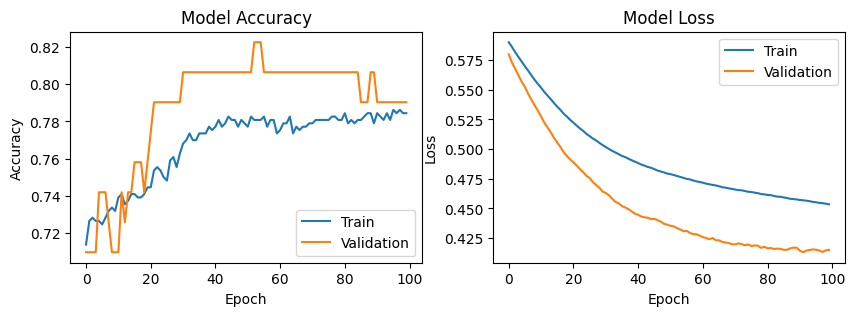

In [54]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy Plot
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()